# 군집분석(비지도학습)

## scikit-learn패키지의 비계층적 클러스터링: k-means 알고리즘

In [1]:
from sklearn import datasets #iris data
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

In [2]:
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']

data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']

data = pd.concat([data,labels],axis=1) #labels와 data 결합
feature = data[ ['Sepal length','Sepal width']] #이번 예제에서는 2개의 속성만을 사용하여 학습용 데이터를 만들었다.
feature.head()

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [3]:
# create model and prediction(모델 선언과 데이터 학습)
model = KMeans(n_clusters=3,algorithm='auto') # n-clusters: 군집의 개수/ algorithm: dense dat의 경우 "elkan"을 쓰고, sparse data의 경우 "full"을 쓴다. "auto"는 디폴트값.
model.fit(feature) #학습data

predict = pd.DataFrame(model.predict(feature)) #훈련data
predict.columns=['predict']

# 자동으로 부여된 cluster label(0,1,2) 확인
r = pd.concat([feature,predict],axis=1)
r

,Sepal length,Sepal width,predict
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
5,5.4,3.9,1
6,4.6,3.4,1
7,5.0,3.4,1
8,4.4,2.9,1
9,4.9,3.1,1


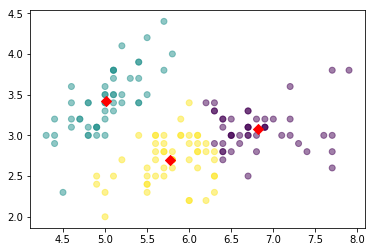

In [4]:
import matplotlib.pyplot as plt
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5) #scatter plot


#
centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width']) #각 클러스터의 중심점
center_x = centers['Sepal length']
center_y = centers['Sepal width']

plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

### inertia value를 이용한 최적 군집수 판단

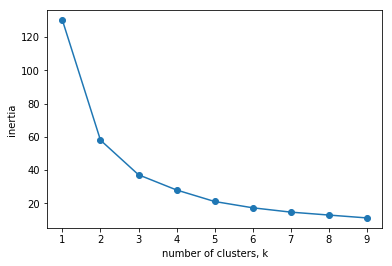

In [5]:
## Inertia value는 군집화가된 후에, 각 중심점에서 군집의 데이타간의 거리를 합산한것이으로 군집의 응집도를 나타내는 값이다.
## 이 값이 작을 수록 응집도가 높게 군집화가 잘되었다고 평가할 수 있다.
ks = range(1,10)
inertias = []

#inertia value는 K-means 모델이 학습된 후에, model.inertia_를 통해 확인할 수 있다.
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(feature)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
## inertia값이 급격하게 하강하다가 3~5사이에서는 변화의 폭이 크지 않은 것을 볼 수 있다.
## 따라서 이 데이터는 2~5개의 클러스터로 분류하는 것이 적절하다고 판단할 수 있다.

## scikit-learn패키지의 비계층적 클러스터링: DBSCAN(밀도기반 클러스터링)

In [6]:
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D #3차원 그래프 시각화

In [7]:
data = pd.concat([data,labels],axis=1) #위에서 썼던 iris data
feature = data[['Sepal length','Sepal width','Petal length','Petal width']] #이번 예제에서는 4개의 속성 이용.
feature.head() #학습에 사용할 피쳐

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# create model and prediction(모델 선언과 데이터 학습)
model = DBSCAN(min_samples=6) #min_samples: 기준점에서 부터의 거리(epsilon) 내에 있는 점의 수(minPts)
predict = pd.DataFrame(model.fit_predict(feature)) #훈련데이터
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1) 
r

,Sepal length,Sepal width,Petal length,Petal width,predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


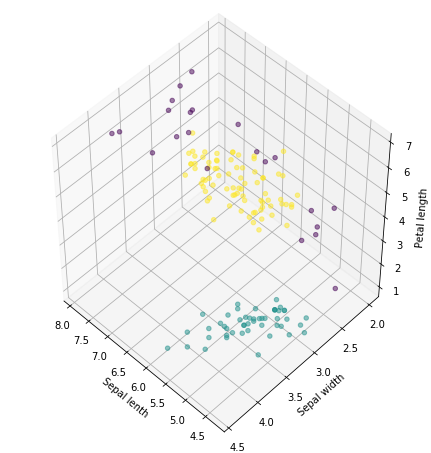

In [9]:
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Sepal length'],r['Sepal width'],r['Petal length'],c=r['predict'],alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()
## 학습은 4차원으로 했으나 시각화는 3차원임.
## 다차원 데이터를 시각화하기 위해서는 차원 감소 기법 필요.

## ## SciPy패키지의 계층적 클러스터링

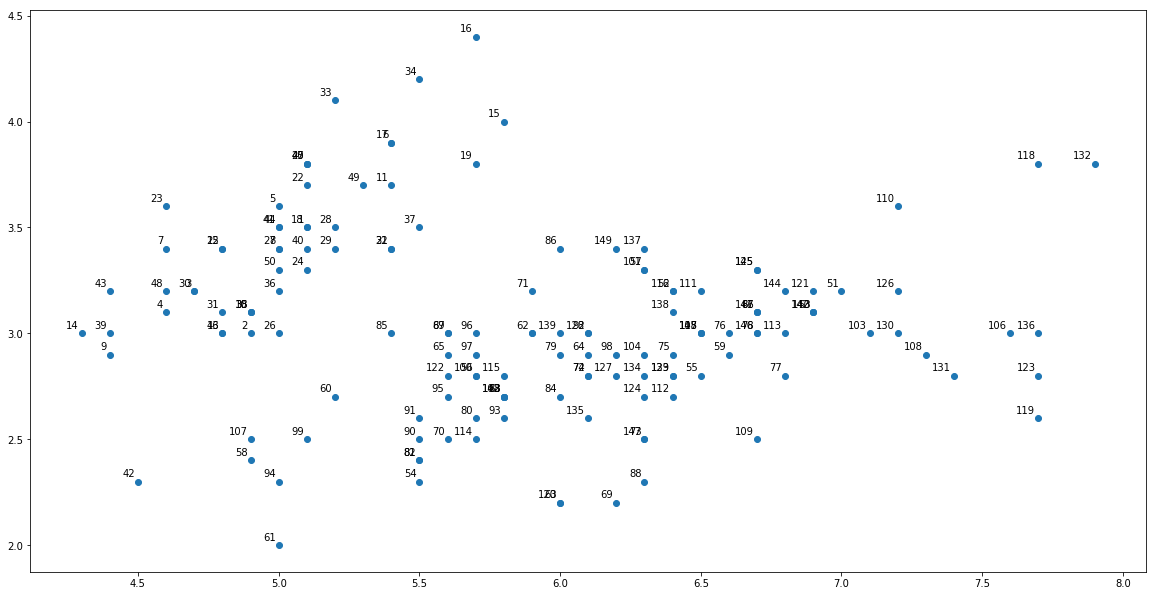

In [52]:
#scatter plot
labels = range(1, 11)  
plt.figure(figsize=(20, 10))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(feature.iloc[:,0],feature.iloc[:,1], label='True Position')

for label, x, y in zip(range(1,len(feature)), feature.iloc[:, 0], feature.iloc[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()  

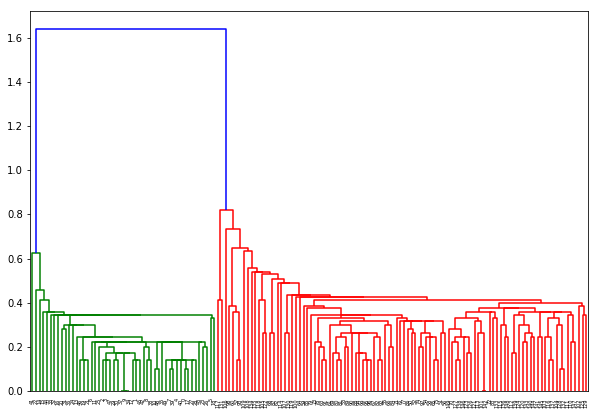

In [43]:
from scipy.cluster.hierarchy import dendrogram,linkage #dendrogram: 클러스터링 결과를 tree형태로 시각화, linkage: Agglomerative(응집형) 계층 클러스터링


linked = linkage(feature, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=feature.index,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

### AgglomerativeClustering 파라미터 설명

> n_clusters = 군집의 개수, 

> affinity= 사용할 거리 척도(유클라디안, 맨하탄, 코사인,민코우스키),

>linkage= 연결 방법(최단, 최장, 중심, 평균..)

In [81]:
# example 1
from sklearn.cluster import AgglomerativeClustering

#유클리디안, 와드 연결법
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')  
cluster.fit_predict(feature)  
print(cluster.labels_)  

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## 응집형 계층적 클러스터링



> 와드연결법은 유클리디안 거리만 적용가능

>>와드연결법(Ward linkage)은 군집간의 거리에 따라 데이터들을 연결하기 보다는
군집내 편차들의 제곱합(within group sum of squares)에 근거를 두고 군집들을 병합시키는 방법이다. 따라서 맨하탄 거리나 다른 거리측정법이 아닌 군집간 직선 연결의 거리를 통해서만 구하는게 가능함.

>>와드연결법은 군집분석의 각 단계에서 데이터들을 하나의 군집으로 묶음으로써 생기는 정보의 손실을
군집의 평균과 데이터들 사이의 오차제곱합(SSE)으로 측정한다.

In [82]:
pd.Series(cluster.labels_).value_counts()

0    64
1    50
2    36
dtype: int64

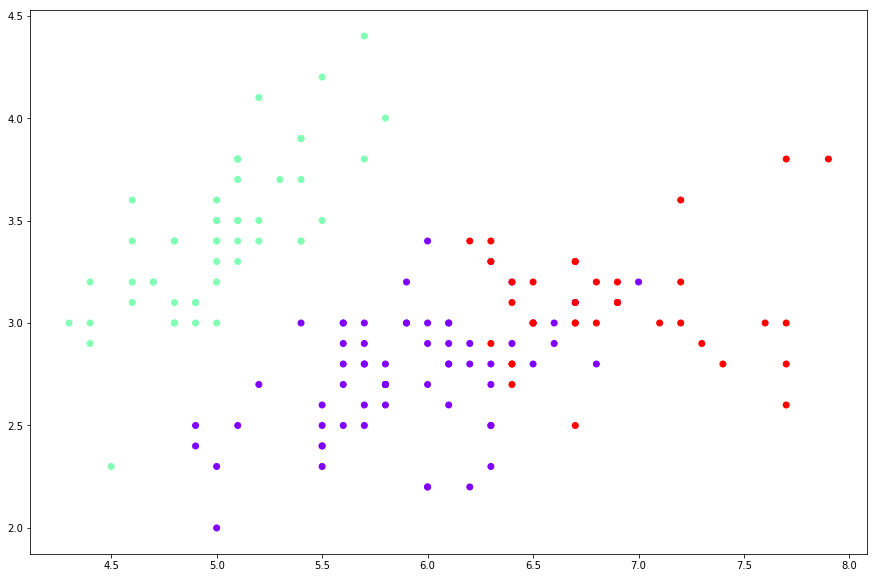

In [83]:
plt.figure(figsize=(15,10))
plt.scatter(feature.iloc[:,0],feature.iloc[:,1], c=cluster.labels_, cmap='rainbow')  

In [84]:
# example 1-1) 맨하탄 거리 평균 연결법
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='manhattan',linkage='average')  
cluster.fit_predict(feature)  
print(cluster.labels_)  

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [85]:
pd.Series(cluster.labels_).value_counts()

0    63
1    50
2    37
dtype: int64

## 거리 측정 방법에 따라 각 군집내 개체수가 달라진 것을 확인할 수 있음

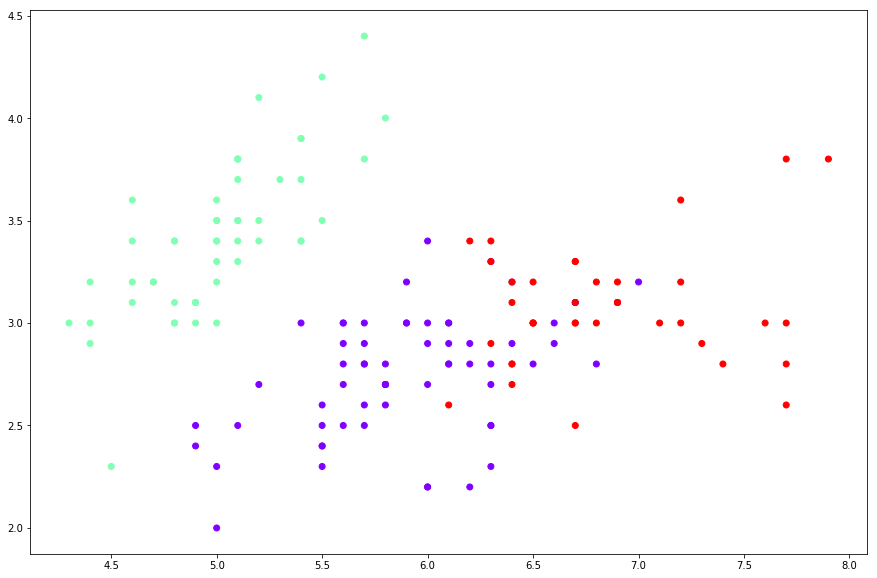

In [76]:
plt.figure(figsize=(15,10))
plt.scatter(feature.iloc[:,0],feature.iloc[:,1], c=cluster.labels_, cmap='rainbow')  

In [ ]:
pd.Series(cluster.labels_).value_counts()

In [15]:
#example 2
customer_data = pd.read_csv('shopping_data.csv')
customer_data.shape 

(200, 5)

In [16]:
customer_data.head()  

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
data = customer_data.iloc[:, 3:5].values

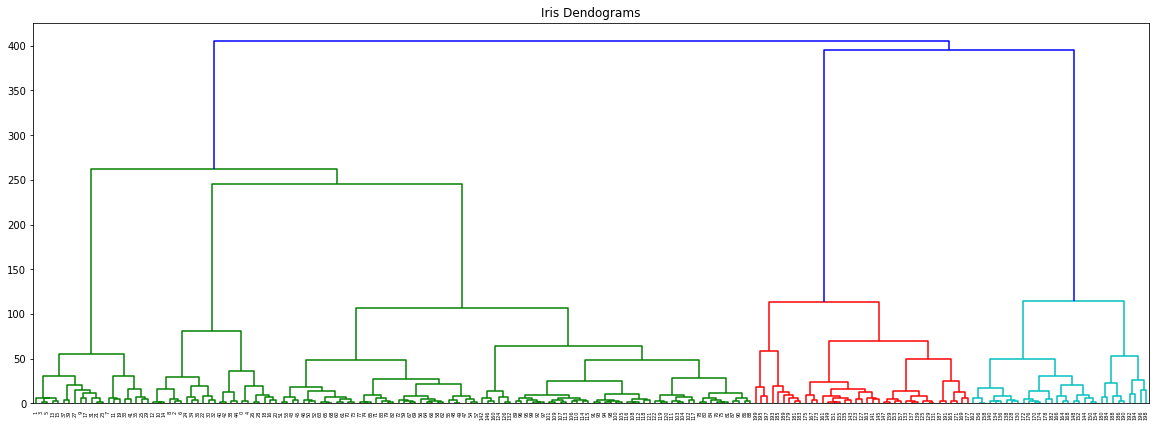

In [89]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 7))  
plt.title("Iris Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  

# 뽀나스

## 자카드 유사도

In [ ]:
def jaccard_similarity(x,y):
    intersection = set(x).intersection(set(y))
    union = set(x).union(set(y))
    return len(intersection)/len(union)
